# Happy Planet Index (HPI)

> The dataset shows where in the world people are using
ecological resources most efficiently to live long, happy lives. It is not only an interesting
resource for learning more about the ecological conditions as well as the socioeconomic
well-being in various parts of our planet but also has an interesting mix of
features that help us demonstrate certain key concepts of interactive visualization. So,**let's dive right in and explore interactive plots using altair**.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [60]:
df = pd.read_csv('hpi_data_countries.tsv',sep='\t')
df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


***

<a id='wrangling'></a>
## Data Wrangling

In [61]:
df.shape

(140, 8)

In [62]:
df.isnull().sum().sum()

0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HPI Rank                           140 non-null    int64  
 1   Country                            140 non-null    object 
 2   Region                             140 non-null    object 
 3   Life Expectancy (years)            140 non-null    float64
 4   Wellbeing (0-10)                   140 non-null    float64
 5   Inequality of outcomes             140 non-null    object 
 6   Ecological Footprint (gha/capita)  140 non-null    float64
 7   Happy Planet Index                 140 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.9+ KB


In [64]:
df.describe()

,HPI Rank,Life Expectancy (years),Wellbeing (0-10),Ecological Footprint (gha/capita),Happy Planet Index
count,140.0000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,70.924286,5.407857,3.260000,26.407857
std,40.5586,8.754048,1.148478,2.303073,7.319404
min,1.0000,48.900000,2.900000,0.600000,12.800000
25%,35.7500,65.025000,4.575000,1.400000,21.175000
50%,70.5000,73.500000,5.250000,2.700000,26.300000
75%,105.2500,77.050000,6.225000,4.450000,31.550000
max,140.0000,83.600000,7.800000,15.800000,44.700000


### renaming columns

In [65]:
df.columns

Index(['HPI Rank', 'Country', 'Region', 'Life Expectancy (years)',
       'Wellbeing (0-10)', 'Inequality of outcomes',
       'Ecological Footprint (gha/capita)', 'Happy Planet Index'],
      dtype='object')

In [66]:
df.columns=['HPI Rank', 'Country', 'Region', 'Life_Expectancy_per_years',
       'Wellbeing (0-10)', 'Inequality_of_outcomes',
       'Ecological Footprint (gha/capita)', 'Happy_Planet_Index']

***

<a id='eda'></a>
## Exploratory Data Analysis

### we'll analyze the Wellbeing scores for each country represented by the legend on the plot.

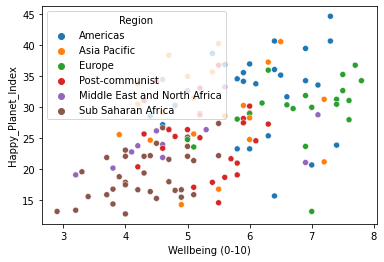

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy_Planet_Index', hue = 'Region', data=df)
plt.show();

####  Wellbeing and Happy Planet Index appear to be correlated

### Adding Hover and Tooltip Functionality to a Scatter Plot

In [68]:
alt.Chart(df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='HPI Rank:Q',
    color = 'Region',
    tooltip=['HPI Rank', 'Country', 'Region', 'Life_Expectancy_per_years',
       'Wellbeing (0-10)', 'Inequality_of_outcomes']
).interactive()

alt.Chart(...)

### Exploring Select and Highlight Functionality on a Scatter Plot

In [69]:
selected_area = alt.selection_interval()
alt.Chart(df).mark_point().encode(
    x='Wellbeing (0-10):Q',
    y='Happy_Planet_Index:Q',
    color = 'Region',
    tooltip=['HPI Rank', 'Country', 'Region', 'Life_Expectancy_per_years',
       'Wellbeing (0-10)', 'Inequality_of_outcomes']
).add_selection(selected_area)

alt.Chart(...)

In [70]:
## alt_value as lightgray to gray out all the points outside of the selection
selected_area = alt.selection_interval()
alt.Chart(df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy_Planet_Index:Q',
    color =alt.condition(selected_area,'Region:N',alt.value('lightgray')),
    tooltip=['HPI Rank', 'Country', 'Region', 'Life_Expectancy_per_years',
       'Wellbeing (0-10)', 'Inequality_of_outcomes']
).add_selection(selected_area)

alt.Chart(...)

We set the `color parameter` in the **encode function** to retains the colors of only the points within the selected area.

>This can be useful when you want to get insights into a particular range of features on
the axes of a scatter plot. Let's go through an exercise to illustrate this.

In [71]:
alt.Chart(df).mark_bar().encode(
 x='Region:N',
    y='Happy_Planet_Index:Q'
).interactive().properties(width=250)

alt.Chart(...)

### Selection across Multiple Plots

> Plot the scatter plot with the Chart altair **vconcat** function to place two plots
**vertically** one after the other

In [72]:
# multiple altair charts placed horizontally next to each other
chart = alt.Chart(df).mark_circle().encode(
y='Happy_Planet_Index',
color='Region:N'
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life_Expectancy_per_years')
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

In [73]:
# multiple altair charts placed vertically next to each other
chart = alt.Chart(df).mark_circle().encode(
y='Happy_Planet_Index',
color='Region:N'
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Ecological Footprint (gha/capita)')
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

>By the way, there are shortcuts for the hconcat and vconcat functions. We can
substitute alt.hconcat(chart1, chart2) with chart1 | chart2 and alt.
vconcat(chart1, chart2) with chart1 & chart2.

In [74]:
chart1 | chart2

alt.HConcatChart(...)

In [75]:
chart1 & chart2

alt.VConcatChart(...)

### Selection Based on the Values of a Feature

>Create an input_dropdown variable using the **binding_select()** function
and set the options parameter to the list of regions in our dataset. Use the
**selection_single()** function to select a set of datapoints. Use the color
variable to store the condition under which datapoints will be selected – the
colors assigned to datapoints within and outside of the selection:

In [76]:
input_dropdown = alt.binding_select(options=list(set(df.Region)))
selected_points = alt.selection_single(fields=['Region'], bind=input_dropdown, name='Select')
color = alt.condition(selected_points,
alt.Color('Region:N'),
alt.value('lightgray'))

alt.Chart(df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy_Planet_Index:Q',
color=color,
tooltip='Region:N').add_selection(selected_points)

alt.Chart(...)

* `mark_circle()`: to denote datapoints in the scatter plot using filled circles.
- `mark_point()` : to use empty circles instead of filled ones.
* `encode` :       to specify the features on the x and y axes
- The various parameters, such as x, y, and color, that we specify in the `encode function` are called **channels** in altair.
+ `interactive()`  : to bring back the zoom feature on the plot
- `add_selection()`  :to specify the selected area.
- `properties(width=400) `  : to increase the width

* to create a rectangular area of selection using the
`selection_interval()`

* `selection_single()` :to get a selected set of datapoints.